# This notebook explores the Kickstarter data set.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="whitegrid")
sns.set_context(context=None, font_scale=1, rc=None)
plt.rcParams['xtick.labelsize']=16
plt.rcParams['ytick.labelsize']=16
plt.rcParams['axes.titlesize']=32

In [2]:
# Reading in data from csv

kickstarter = pd.read_csv('kickstarter.csv', index_col = 0)

In [3]:
# Taking a look at the first few rows.

kickstarter.head()

,id,backers_count,blurb,currency,goal,launched_at,deadline,location.country,name,usd_pledged,...,days_to_deadline,goal_USD,category_name,category_slug,blurb_length,location_type,location_country,location_state,location_displayable_name,binary_state
0,857125548,1,Exploring paint and its place in a digital world.,USD,2000.0,2015-03-19 22:34:57,2015-04-30 23:12:00,US,Remix,25.00000,...,42,2000.0000,Digital Art,art,9,Town,US,NY,"New York, NY",failed
1,1038659700,2,Mike Fassio wants a side-by-side photo of me a...,USD,10.0,2014-07-17 01:55:07,2014-07-27 01:55:07,US,Photo of Grant and Hazel eating cake with bare...,6.00000,...,10,10.0000,Digital Art,art,21,Town,US,WA,"Seattle, WA",failed
2,1238331911,0,I need your help to get a nice graphics tablet...,USD,900.0,2014-07-30 16:29:13,2014-08-29 16:29:13,US,Minecraft Digital Art/Animations,0.00000,...,30,900.0000,Digital Art,art,12,Town,US,VA,"Moneta, VA",failed
3,189217262,0,I want to create a Nature Photograph Series of...,USD,900.0,2015-05-11 16:09:11,2015-05-31 16:09:11,US,Sacramento Nature Photograph Series,0.00000,...,20,900.0000,Digital Art,art,17,Town,US,CA,"Sacramento, CA",failed
4,1260075071,1,I want to bring colour to the world in my own ...,GBP,15000.0,2015-02-06 21:52:02,2015-03-08 20:52:02,GB,North Africa art project - my dream,1.52011,...,30,22801.6545,Digital Art,art,26,County,GB,England,"Essex, UK",failed


In [4]:
# How many Kickstarter projects are there? What percentage of them were successful?
original_success = kickstarter.groupby(by='state')['goal'].count()
new_state_success = kickstarter.groupby(by='binary_state')['goal'].count()

original_success_labels = original_success.index.values.tolist()
original_success_sizes = original_success.values.tolist()

new_state_labels = new_state_success.index.values.tolist()
new_state_sizes = new_state_success.values.tolist()


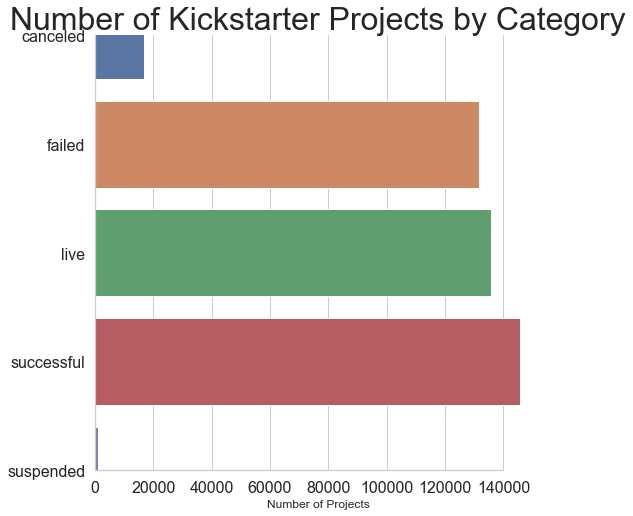

In [5]:
f, ax = plt.subplots(figsize=(8, 8))
sns.barplot(x=original_success_sizes, y=original_success_labels)
sns.despine(trim=True)
ax.set_title("Number of Kickstarter Projects by Category")
ax.set_xlabel("Number of Projects")
plt.show()

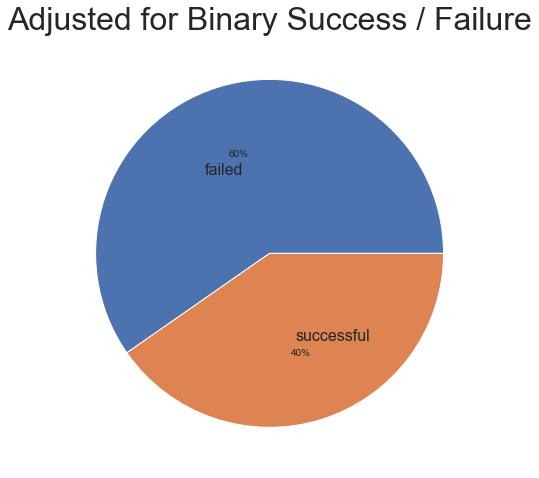

In [6]:
new_state_labels = new_state_success.index.values.tolist()
new_state_sizes = new_state_success.values.tolist()

f, ax = plt.subplots(figsize=(8, 8))
plt.pie(new_state_sizes, labels=new_state_labels, autopct='%.0f%%', labeldistance=.5)
plt.title("Adjusted for Binary Success / Failure")
plt.show()


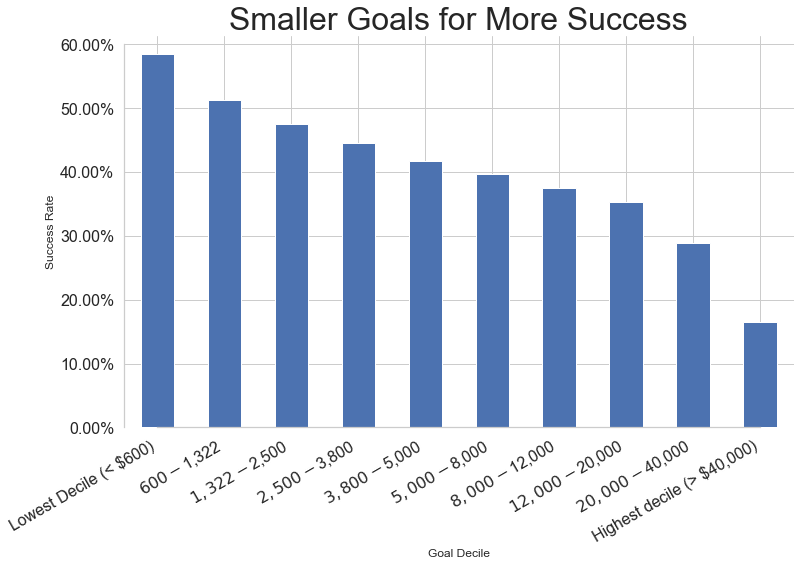

In [7]:
failed = kickstarter[kickstarter['binary_state'] == 'failed']['goal_USD']
successful = kickstarter[kickstarter['binary_state'] == 'successful']['goal_USD']
bins = pd.qcut(failed, 10, retbins=True, precision=0)

by_goal = kickstarter.groupby(pd.qcut(kickstarter.goal_USD, 10))['binary_state'].value_counts()
by_goal = by_goal.unstack(['binary_state'])
by_goal['success_rate'] = by_goal['successful'] / (by_goal['successful'] + by_goal['failed'])
by_goal['bins'] = ['Lowest Decile (< $600)', '$600-$1,322', '$1,322-$2,500', '$2,500-$3,800', 
                      '$3,800-$5,000', '$5,000-$8,000', '$8,000-$12,000', '$12,000-$20,000', 
                       '$20,000-$40,000', 'Highest decile (> $40,000)']

f, ax = plt.subplots(figsize=(12, 8))
by_goal['success_rate'].plot(kind='bar')
ax.set_title('Smaller Goals for More Success')
ax.set_xlabel('Goal Decile')
ax.set_ylabel('Success Rate')
ax.set_xticklabels(by_goal['bins'])
xvals = ax.get_xticks()
yvals = ax.get_yticks()
f.autofmt_xdate()
sns.despine(trim=True)
ax.set_yticklabels(['{:,.2%}'.format(x) for x in yvals])
plt.show()


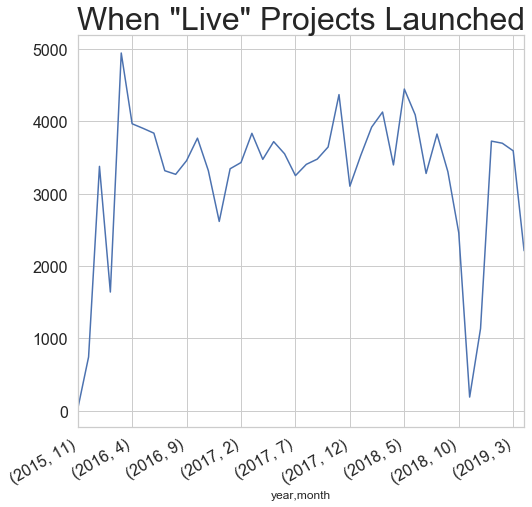

In [8]:
import matplotlib.dates
livebymonth = kickstarter[kickstarter['state'] == 'live'].groupby(['year', 'month']).count()
f, ax = plt.subplots(figsize=(8, 8))
livebymonth['id'].plot()
ax.set_title('When "Live" Projects Launched')
xvals = ax.get_xticks()
yvals = ax.get_yticks()
f.autofmt_xdate()

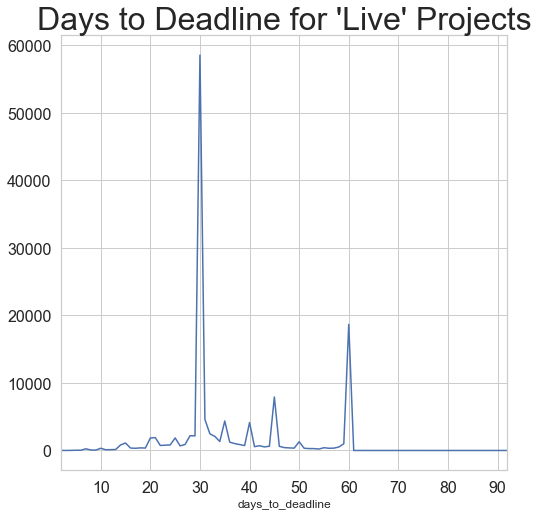

In [9]:
deadlinedays = kickstarter[kickstarter['state'] == 'live'].groupby('days_to_deadline').count()
f, ax = plt.subplots(figsize=(8, 8))
ax.set_title("Days to Deadline for 'Live' Projects")
deadlinedays['id'].plot()
plt.show()

In [10]:
# Breaking down success by category slug
success_by_category_name = pd.pivot_table(kickstarter, index='category_slug', columns='binary_state', values='goal', aggfunc='count', fill_value = 0)
print(success_by_category_name)

binary_state   failed  successful
category_slug                    
art             20134       14548
comics           6750        9520
crafts           6467        2992
dance            1548        2625
design          14115       17693
fashion         21535        9257
film & video    31631       25525
food            19142        7052
games           24954       23434
journalism       5329        1321
music           27734       23444
photography      6281        4123
publishing      31100       16075
technology      36449       10233
theater          4048        5879


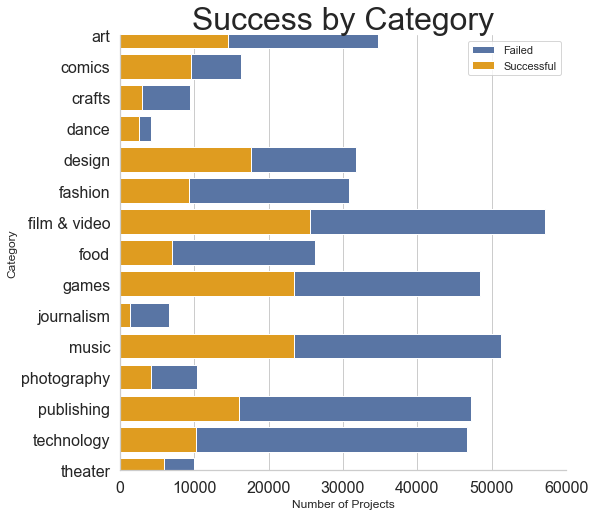

In [11]:
# Breaking down success by category
success_by_category_name = pd.pivot_table(kickstarter, index='category_slug', columns='binary_state', values='goal', aggfunc='count', fill_value = 0)
success_by_category_name['total'] = success_by_category_name['failed'] + success_by_category_name['successful'] 
success_by_category_name['success_rate'] = success_by_category_name['successful'] / success_by_category_name['total']
topcategories = success_by_category_name.sort_values(by='category_slug').reset_index()

f, ax = plt.subplots(figsize=(8, 8))

sns.barplot(x="total", y="category_slug", data=topcategories, label="Failed", color="b")
sns.barplot(x="successful", y="category_slug", data=topcategories, label="Successful", color='orange')
sns.despine(trim=True)

plt.title("Success by Category")
plt.xlabel("Number of Projects")
plt.ylabel("Category")
plt.legend()
plt.show()


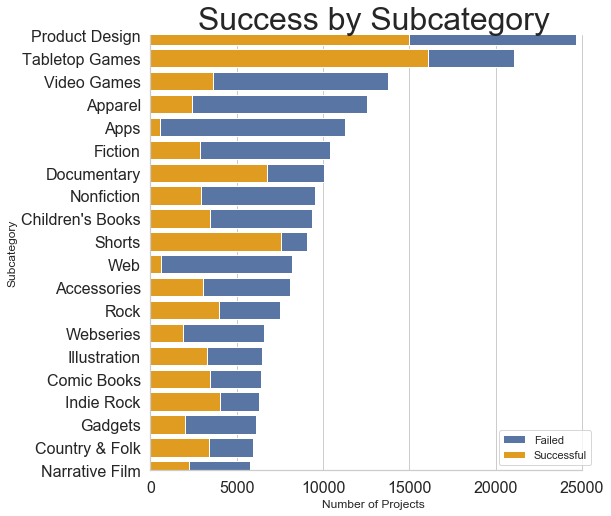

In [12]:
# Top Subcategories

# Breaking down success by subcategory
success_by_subcategory = pd.pivot_table(kickstarter, index='category_name', columns='binary_state', values='goal', aggfunc='count', fill_value = 0)
success_by_subcategory['total'] = success_by_subcategory['failed'] + success_by_subcategory['successful'] 
success_by_subcategory['success_rate'] = success_by_subcategory['successful'] / success_by_subcategory['total']
topcategories = success_by_subcategory.sort_values(by='total', ascending=False).reset_index().head(20)

f, ax = plt.subplots(figsize=(8, 8))

sns.barplot(x='total', y='category_name', data=topcategories, label='Failed', color="b")
sns.barplot(x='successful', y='category_name', data=topcategories, label='Successful', color='orange')
sns.despine(trim=True)

plt.title("Success by Subcategory")
plt.xlabel("Number of Projects")
plt.ylabel("Subcategory")
plt.legend()
plt.show()


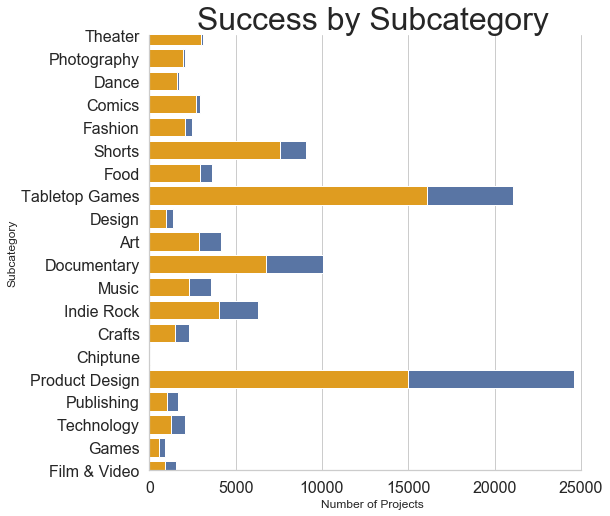

In [13]:
# Top Subcategories

# Breaking down success by subcategory
success_by_subcategory = pd.pivot_table(kickstarter, index='category_name', columns='binary_state', values='goal', aggfunc='count', fill_value = 0)
success_by_subcategory['total'] = success_by_subcategory['failed'] + success_by_subcategory['successful'] 
success_by_subcategory['success_rate'] = success_by_subcategory['successful'] / success_by_subcategory['total']
topcategories = success_by_subcategory.sort_values(by='success_rate', ascending=False).reset_index().head(20)

f, ax = plt.subplots(figsize=(8, 8))

sns.barplot(x='total', y='category_name', data=topcategories, label='Failed', color="b")
sns.barplot(x='successful', y='category_name', data=topcategories, label='Successful', color='orange')
sns.despine(trim=True)

plt.title("Success by Subcategory")
plt.xlabel("Number of Projects")
plt.ylabel("Subcategory")
plt.show()

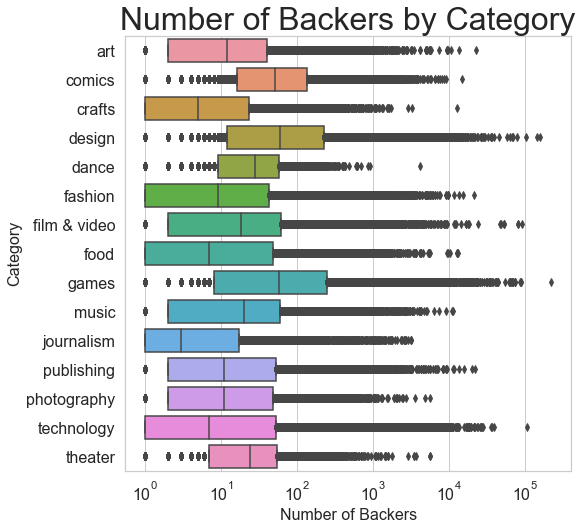

In [14]:
f, ax = plt.subplots(figsize=(8, 8))
sns.boxplot(x='backers_count', y='category_slug', data=kickstarter, whis=[25, 75])
ax.set_xscale("log")
ax.set_title("Number of Backers by Category")
ax.set_xlabel("Number of Backers", fontsize=16)
ax.set_ylabel("Category", fontsize=16)
plt.show()

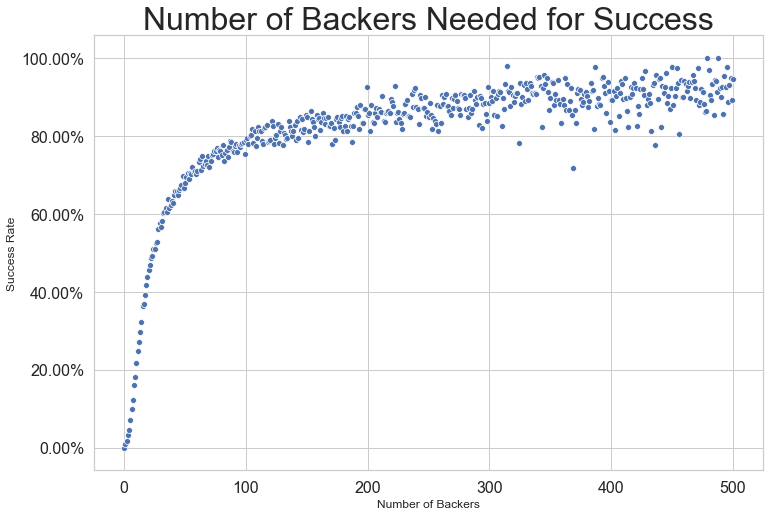

In [15]:
# How many projects have N number of backers? If you have N backers, what is your success rate?
nbackers = kickstarter.groupby(['backers_count', 'binary_state']).count()
nbackers = nbackers['state'].unstack()
nbackers = nbackers.fillna(0)
nbackers['success_rate'] = nbackers['successful'] / (nbackers['failed'] + nbackers['successful'])
plot = nbackers['success_rate'][0:500]
nbackersdf = pd.DataFrame(nbackers[0:501])

f, ax = plt.subplots(figsize=(12, 8))

sns.scatterplot(data = nbackersdf['success_rate'])
ax.set_xlabel('Number of Backers')
ax.set_ylabel('Success Rate')
ax.set_title('Number of Backers Needed for Success')

vals = ax.get_yticks()
ax.set_yticklabels(['{:,.2%}'.format(x) for x in vals])
plt.show()


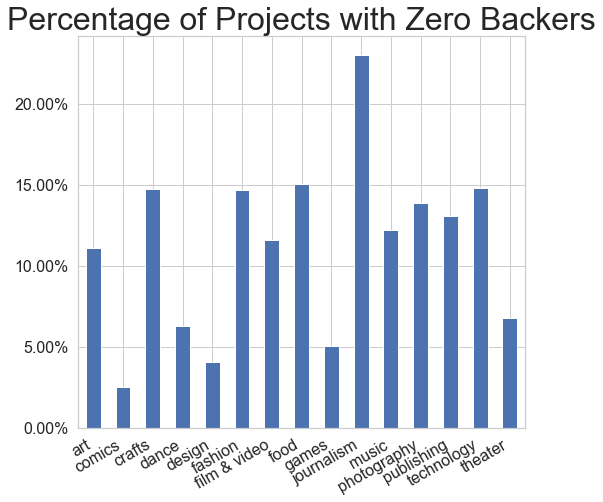

In [16]:
# Zero followers
kickstarter[kickstarter['backers_count'] == 0].groupby('category_slug').count()['id'] 
zero_followers = kickstarter[kickstarter['backers_count'] == 0].groupby('category_slug').count()['id']  / kickstarter['category_slug'].value_counts()
f, ax = plt.subplots(figsize=(8, 8))
zero_followers.plot(kind='bar')
f.autofmt_xdate()
ax.set_title("Percentage of Projects with Zero Backers")
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.2%}'.format(x) for x in vals])
plt.show()

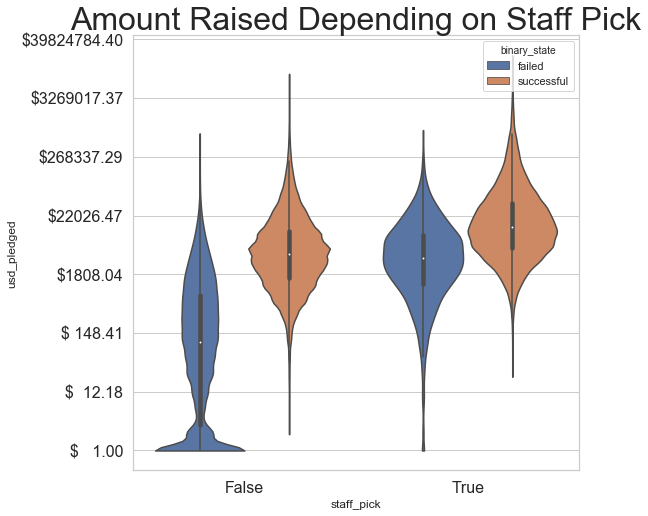

In [17]:
f, ax = plt.subplots(figsize=(8, 8))
g = sns.violinplot(x=kickstarter["staff_pick"], y=np.log1p(kickstarter["usd_pledged"]), hue=kickstarter["binary_state"], cut=0)
vals = ax.get_yticks()
exp_vals = [np.exp(val) for val in vals]
ax.set_yticklabels(['${0:7.2f}'.format(x) for x in exp_vals])
g.set_title("Amount Raised Depending on Staff Pick")
plt.show()

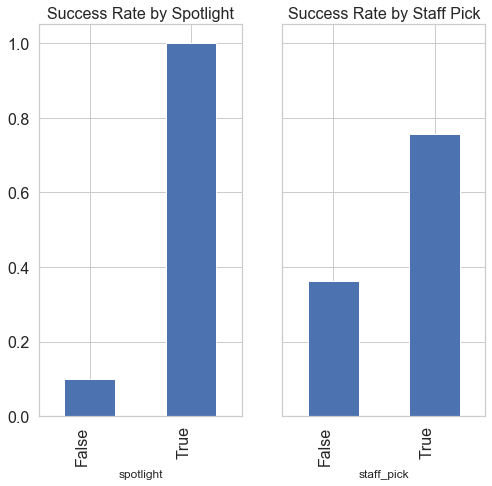

In [18]:
byspotlight = kickstarter.groupby(by=['spotlight', 'binary_state']).count()
byspotlight = byspotlight['id'].unstack('binary_state').fillna(0)
byspotlight['success_rate'] = byspotlight['successful'] / (byspotlight['successful'] + byspotlight['failed'])

bystaffpick = kickstarter.groupby(by=['staff_pick', 'binary_state']).count()
bystaffpick = bystaffpick['id'].unstack('binary_state').fillna(0)
bystaffpick['success_rate'] = bystaffpick['successful'] / (bystaffpick['successful'] + bystaffpick['failed'])

f, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(8, 8))
f.autofmt_xdate()
ax1.set_title('Success Rate by Spotlight', fontsize=16)
ax2.set_title('Success Rate by Staff Pick', fontsize=16)

byspotlight
byspotlight['success_rate'].plot(kind='bar', ax=ax1)
bystaffpick['success_rate'].plot(kind='bar', ax=ax2)

plt.show()

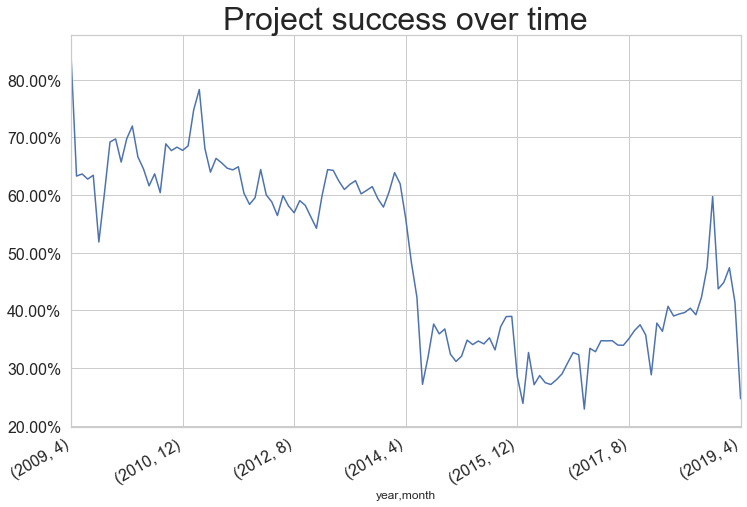

In [19]:
timeseries = kickstarter.groupby(['year', 'month', 'binary_state']).count()
timeseries = timeseries['id'].unstack('binary_state').fillna(0)
timeseries['success_rate'] = timeseries['successful'] / (timeseries['failed'] + timeseries['successful'])

f, ax = plt.subplots(figsize=(12, 8))
timeseries['success_rate'].plot()
ax.set_title('Project success over time')
xvals = ax.get_xticks()
yvals = ax.get_yticks()
ax.set_yticklabels(['{:,.2%}'.format(x) for x in yvals])
f.autofmt_xdate()

In [20]:
# Success rate by US state
byusstate = kickstarter[kickstarter['location_country']=='US'].groupby(['location_state', 'binary_state']).count()
byusstate.drop(['Erongo', 'Khomas', 'Okavango', '-'], inplace=True)
byusstate = byusstate['id'].unstack('binary_state')
byusstate['success_rate'] = byusstate['successful'] / (byusstate['failed'] + byusstate['successful'])
print(byusstate.sort_values('success_rate', ascending=False).head(5))

binary_state    failed  successful  success_rate
location_state                                  
VT                 521         662      0.559594
MA                3841        4200      0.522323
NY               15732       16979      0.519061
OR                3752        3655      0.493452
RI                 548         533      0.493062


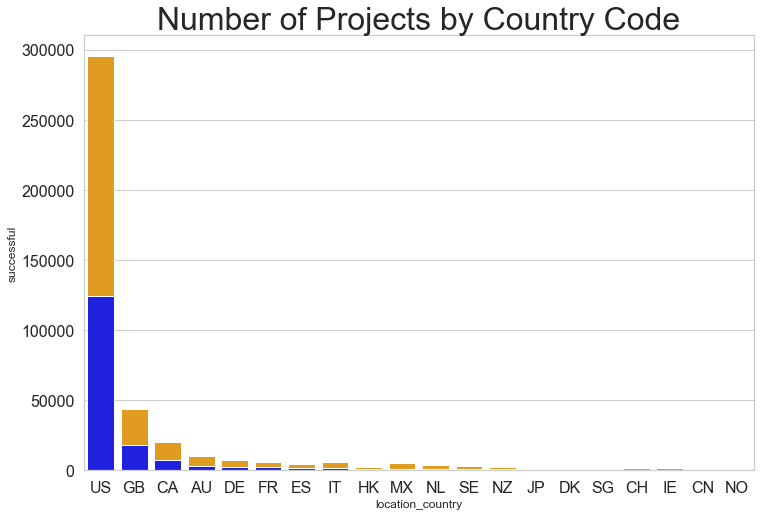

In [21]:
# Success rate by country
byworld = kickstarter.groupby(['location_country', 'binary_state']).count()
byworld = byworld['id'].unstack('binary_state').fillna(0).sort_values('successful', ascending=False)
byworld['success_rate'] = byworld['successful'] / (byworld['successful'] + byworld['failed'])
byworld['total'] = byworld['successful'] + byworld['failed']

f, ax = plt.subplots(figsize=(12, 8))
sns.barplot(x='location_country', y='total', data=byworld[0:20].reset_index(), color='orange')
sns.barplot(x='location_country', y='successful', data=byworld[0:20].reset_index(), color='blue')
ax.set_title("Number of Projects by Country Code")
yvals = ax.get_yticks()
plt.show()

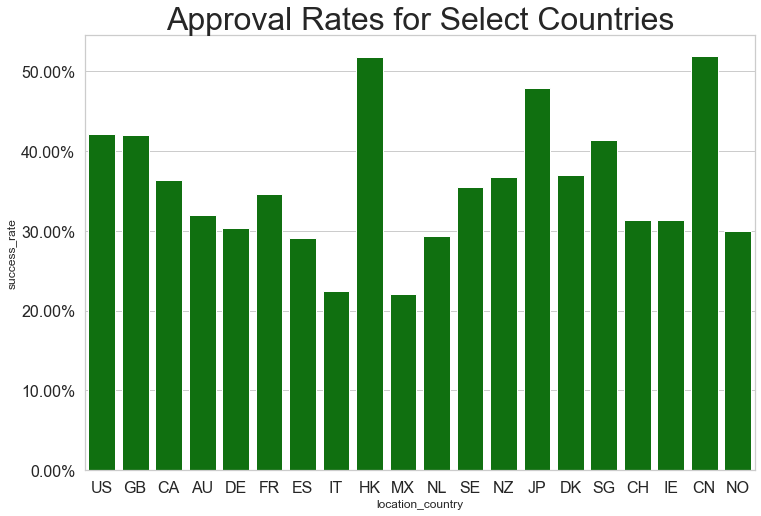

In [22]:
f, ax = plt.subplots(figsize=(12, 8))
sns.barplot(x='location_country', y='success_rate', data=byworld[0:20].reset_index(), color='green')
yvals = ax.get_yticks()
ax.set_yticklabels(['{:,.2%}'.format(x) for x in yvals], fontsize=16)
ax.set_title("Approval Rates for Select Countries")
plt.show()

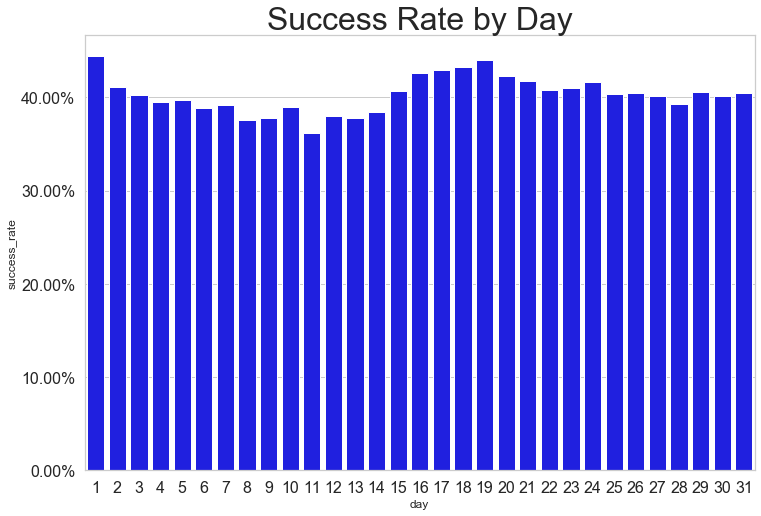

In [23]:
# Success by day
byday = kickstarter.groupby(['day', 'binary_state']).count()
byday = byday['id'].unstack('binary_state').fillna(0).reset_index()
byday['success_rate'] = byday['successful'] / (byday['successful'] + byday['failed'])
byday['total'] = byday['successful'] + byday['failed']


f, ax = plt.subplots(figsize=(12, 8))
sns.barplot(x='day', y='success_rate', data=byday, color='blue')
ax.set_title("Success Rate by Day")
ax.set_yticklabels(['{:,.2%}'.format(x) for x in yvals])
yvals = ax.get_yticks()
plt.show()



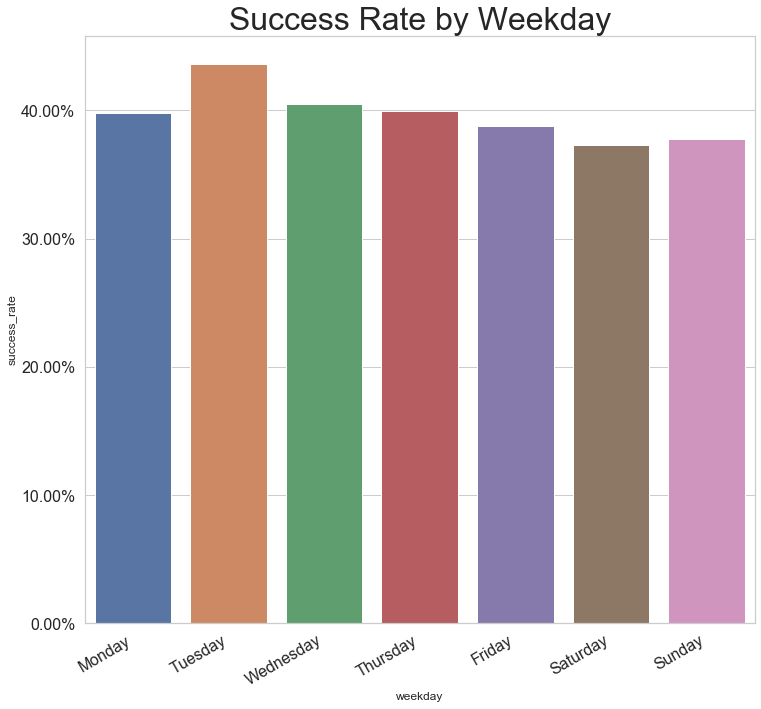

In [24]:
kickstarter.loc[:, 'weekday'] = pd.to_datetime(kickstarter[['month', 'day', 'year']]).dt.dayofweek

# Success by weekday
byweekday = kickstarter.groupby(['weekday', 'binary_state']).count()
byweekday = byweekday['id'].unstack('binary_state').fillna(0).reset_index()
byweekday['success_rate'] = byweekday['successful'] / (byweekday['successful'] + byweekday['failed'])
byweekday['total'] = byweekday['successful'] + byweekday['failed']

f, ax = plt.subplots(figsize=(12, 12))
sns.barplot(x='weekday', y='success_rate', data=byweekday)
ax.set_title("Success Rate by Weekday")
ax.set_yticklabels(['{:,.2%}'.format(x) for x in yvals])
ax.set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
yvals = ax.get_yticks()
f.autofmt_xdate()
plt.show()